In [125]:
#!git clone https://github.com/SergioDLezama/Lung-Cancer-Prediction-ML

In [126]:
#!pip install scikeras

In [127]:
#!pip install keras-tuner

In [193]:
# Importing necesaries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from sklearn import tree
from sklearn import metrics
from sklearn import model_selection
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, recall_score

from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from keras_tuner import RandomSearch
from tensorflow.keras import backend

import warnings
warnings.filterwarnings("ignore")

In [129]:
# Importing the dataset
df = pd.read_csv('/content/Lung-Cancer-Prediction-ML/lungcancerdataset.csv')

In [130]:
# Copy just in case
data = df.copy()

In [131]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

- There is 3000 rows, 16 columns
- 2 object type columns (Gender & Lung Cancer)

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,3000.0,55.169000,14.723746,30.0,42.0,55.0,68.0,80.0
SMOKING,3000.0,1.491000,0.500002,1.0,1.0,1.0,2.0,2.0
YELLOW_FINGERS,3000.0,1.514000,0.499887,1.0,1.0,2.0,2.0,2.0
ANXIETY,3000.0,1.494000,0.500047,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,3000.0,1.499000,0.500082,1.0,1.0,1.0,2.0,2.0
CHRONIC_DISEASE,3000.0,1.509667,0.499990,1.0,1.0,2.0,2.0,2.0
FATIGUE,3000.0,1.489667,0.499977,1.0,1.0,1.0,2.0,2.0
ALLERGY,3000.0,1.506667,0.500039,1.0,1.0,2.0,2.0,2.0
WHEEZING,3000.0,1.497333,0.500076,1.0,1.0,1.0,2.0,2.0
ALCOHOL_CONSUMING,3000.0,1.491333,0.500008,1.0,1.0,1.0,2.0,2.0


- The patients range in age from 30 to 80

In [134]:
# Checking for duplicated
df.duplicated().sum()

2

In [135]:
# Dropping duplicated rows

print('Before dropping',df.shape[0])
df = df.drop_duplicates()
print('Before dropping',df.shape[0])

Before dropping 3000
Before dropping 2998


In [136]:
# Mapping the data, from 1 & 2 to 0 & 1

cols_to_mod = df.columns[df.dtypes == 'int64']
cols_to_mod = cols_to_mod.drop('AGE')

for col in cols_to_mod:
    df[col] = df[col].map({1:0,2:1})
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,0,0,0,1,1,0,1,1,1,1,1,1,0,NO
1,F,55,0,1,1,0,0,1,1,1,0,0,0,1,1,NO
2,F,78,1,1,0,0,0,1,0,1,0,0,1,0,0,YES
3,M,60,1,0,0,0,1,0,1,0,0,1,0,1,1,YES
4,F,80,0,0,1,0,0,1,0,1,0,0,0,0,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,1,0,0,1,1,0,0,0,0,1,0,0,1,NO
2996,F,75,0,1,0,0,0,1,1,1,1,0,0,1,0,NO
2997,F,62,1,1,1,0,1,1,1,1,0,0,1,1,1,YES
2998,M,30,0,0,1,1,1,1,1,1,1,0,1,0,1,YES


In [137]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,2998.0,55.171448,14.728302,30.0,42.0,55.0,68.0,80.0
SMOKING,2998.0,0.491328,0.500008,0.0,0.0,0.0,1.0,1.0
YELLOW_FINGERS,2998.0,0.514009,0.499887,0.0,0.0,1.0,1.0,1.0
ANXIETY,2998.0,0.493996,0.500047,0.0,0.0,0.0,1.0,1.0
PEER_PRESSURE,2998.0,0.498666,0.500082,0.0,0.0,0.0,1.0,1.0
CHRONIC_DISEASE,2998.0,0.509673,0.499990,0.0,0.0,1.0,1.0,1.0
FATIGUE,2998.0,0.489660,0.499976,0.0,0.0,0.0,1.0,1.0
ALLERGY,2998.0,0.507005,0.500034,0.0,0.0,1.0,1.0,1.0
WHEEZING,2998.0,0.497332,0.500076,0.0,0.0,0.0,1.0,1.0
ALCOHOL_CONSUMING,2998.0,0.491328,0.500008,0.0,0.0,0.0,1.0,1.0


In [138]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,2,1,1,2,2,1,1,1,1,2,1,1,2,NO
2996,F,75,1,2,1,1,1,2,2,2,2,1,1,2,1,NO
2997,F,62,2,2,2,1,2,2,2,2,1,1,2,2,2,YES
2998,M,30,1,1,2,2,2,2,2,2,2,1,2,1,2,YES


In [139]:
# Create a new column with age intervals of 10. Just for analysis reasons
bins = [30, 40, 50, 60, 70, 80]
labels = ['30-39', '40-49', '50-59', '60-69', '70-80']

df['AGE_INTERVAL'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=True, include_lowest=True)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER,AGE_INTERVAL
0,M,65,0,0,0,1,1,0,1,1,1,1,1,1,0,NO,60-69
1,F,55,0,1,1,0,0,1,1,1,0,0,0,1,1,NO,50-59
2,F,78,1,1,0,0,0,1,0,1,0,0,1,0,0,YES,70-80
3,M,60,1,0,0,0,1,0,1,0,0,1,0,1,1,YES,50-59
4,F,80,0,0,1,0,0,1,0,1,0,0,0,0,1,NO,70-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,1,0,0,1,1,0,0,0,0,1,0,0,1,NO,70-80
2996,F,75,0,1,0,0,0,1,1,1,1,0,0,1,0,NO,70-80
2997,F,62,1,1,1,0,1,1,1,1,0,0,1,1,1,YES,60-69
2998,M,30,0,0,1,1,1,1,1,1,1,0,1,0,1,YES,30-39


In [140]:
cols = df.columns.tolist()
cols.remove('AGE')
for i in df[cols]:
  print('*'*25)
  print(df[i].value_counts(normalize=True))

*************************
GENDER
M    0.504336
F    0.495664
Name: proportion, dtype: float64
*************************
SMOKING
0    0.508672
1    0.491328
Name: proportion, dtype: float64
*************************
YELLOW_FINGERS
1    0.514009
0    0.485991
Name: proportion, dtype: float64
*************************
ANXIETY
0    0.506004
1    0.493996
Name: proportion, dtype: float64
*************************
PEER_PRESSURE
0    0.501334
1    0.498666
Name: proportion, dtype: float64
*************************
CHRONIC_DISEASE
1    0.509673
0    0.490327
Name: proportion, dtype: float64
*************************
FATIGUE
0    0.51034
1    0.48966
Name: proportion, dtype: float64
*************************
ALLERGY
1    0.507005
0    0.492995
Name: proportion, dtype: float64
*************************
WHEEZING
0    0.502668
1    0.497332
Name: proportion, dtype: float64
*************************
ALCOHOL_CONSUMING
0    0.508672
1    0.491328
Name: proportion, dtype: float64
*********************

- Most of the data is balanced.
- 20% of the patients are 30-39

In [141]:
# Code to plot a stacked barplot
def stack_bar(data,predictor,target,figsize=(8,4)):
  (pd.crosstab(df[predictor],df[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True,color=('grey','c'))
  plt.xticks(rotation=0)
  plt.legend(loc="lower right")

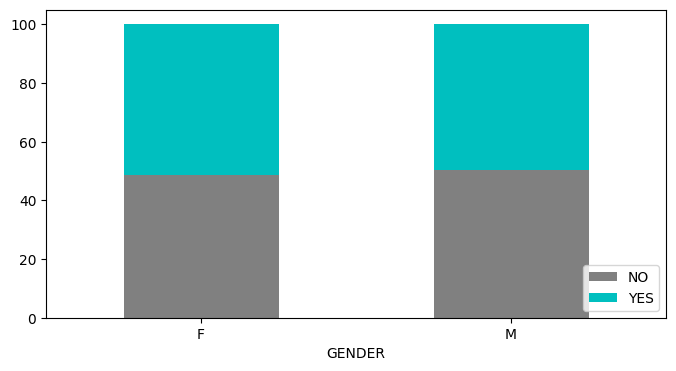

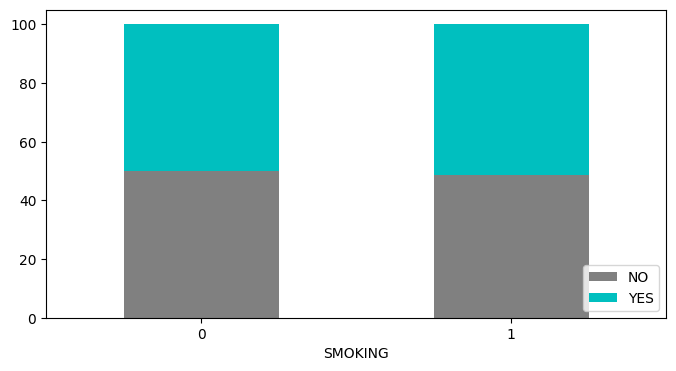

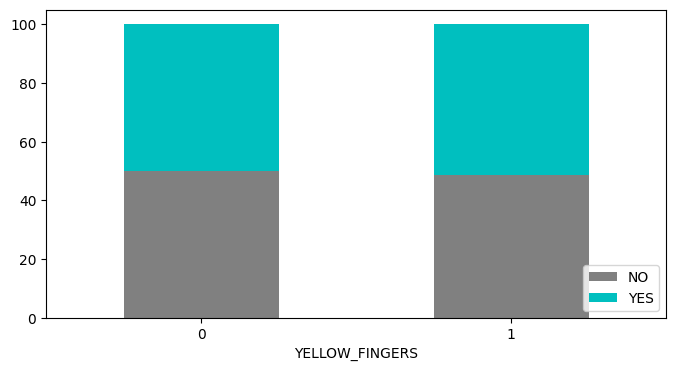

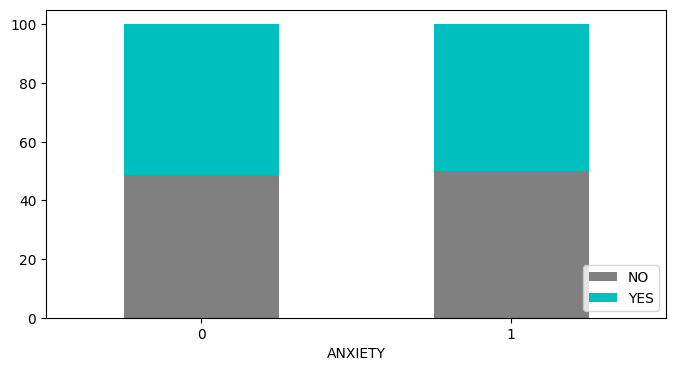

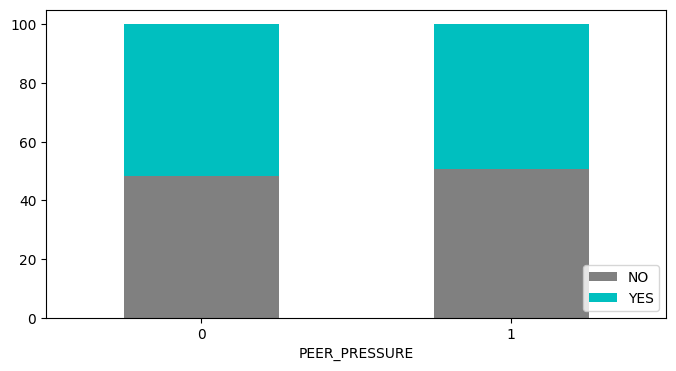

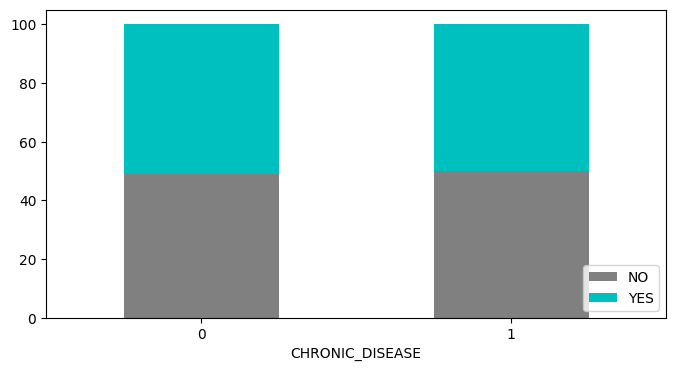

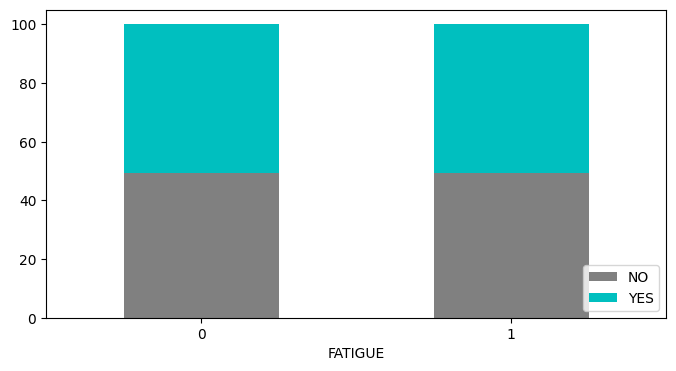

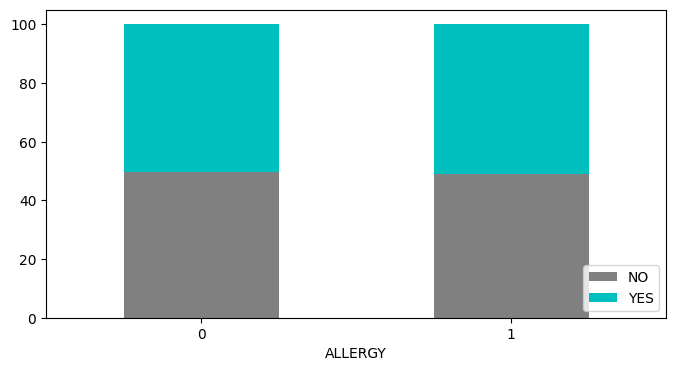

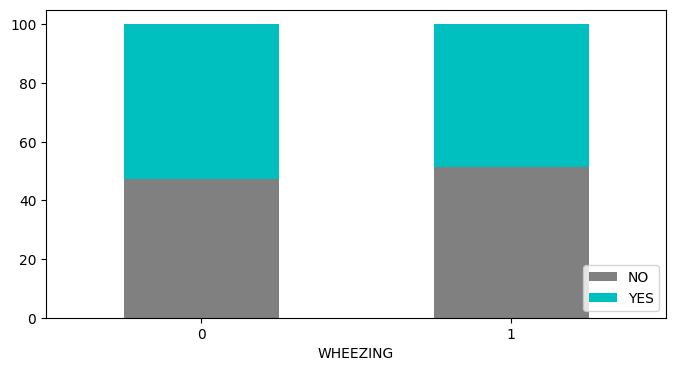

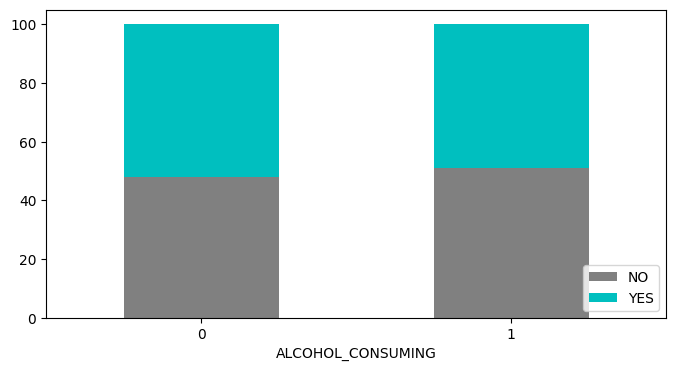

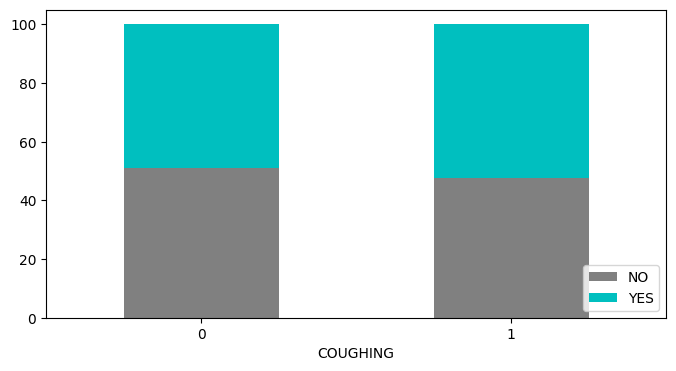

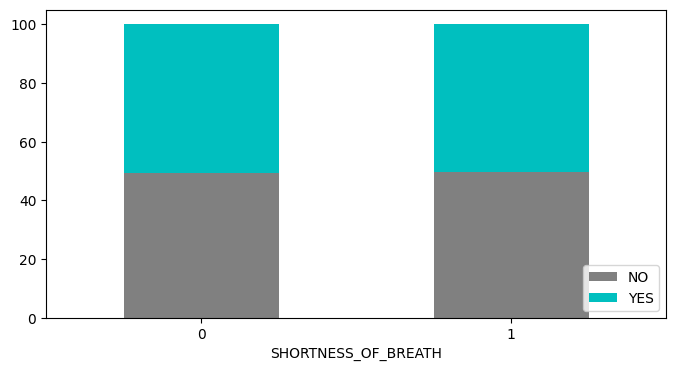

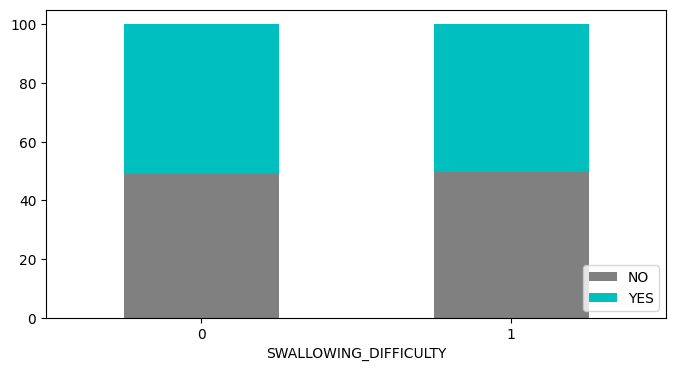

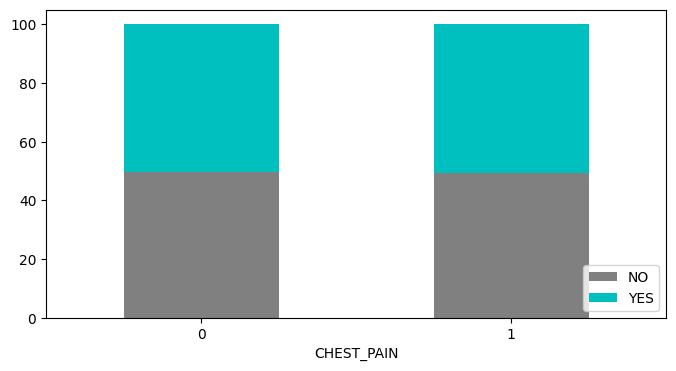

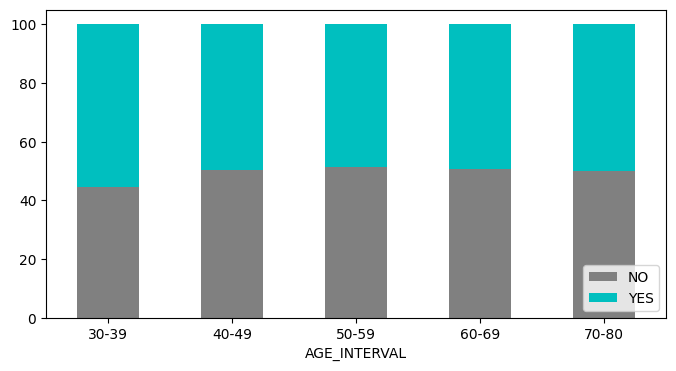

In [142]:
cols_to_analyze = df.columns
cols_to_analyze = cols_to_analyze.drop(['LUNG_CANCER','AGE'])
for i in cols_to_analyze:
  stack_bar(df,i,'LUNG_CANCER')

- There is no clear pattern visible between the variables and whether the patient has cancer or not.
- We can see that in the ages of 30-39, the majority of cases are positive.

<Axes: >

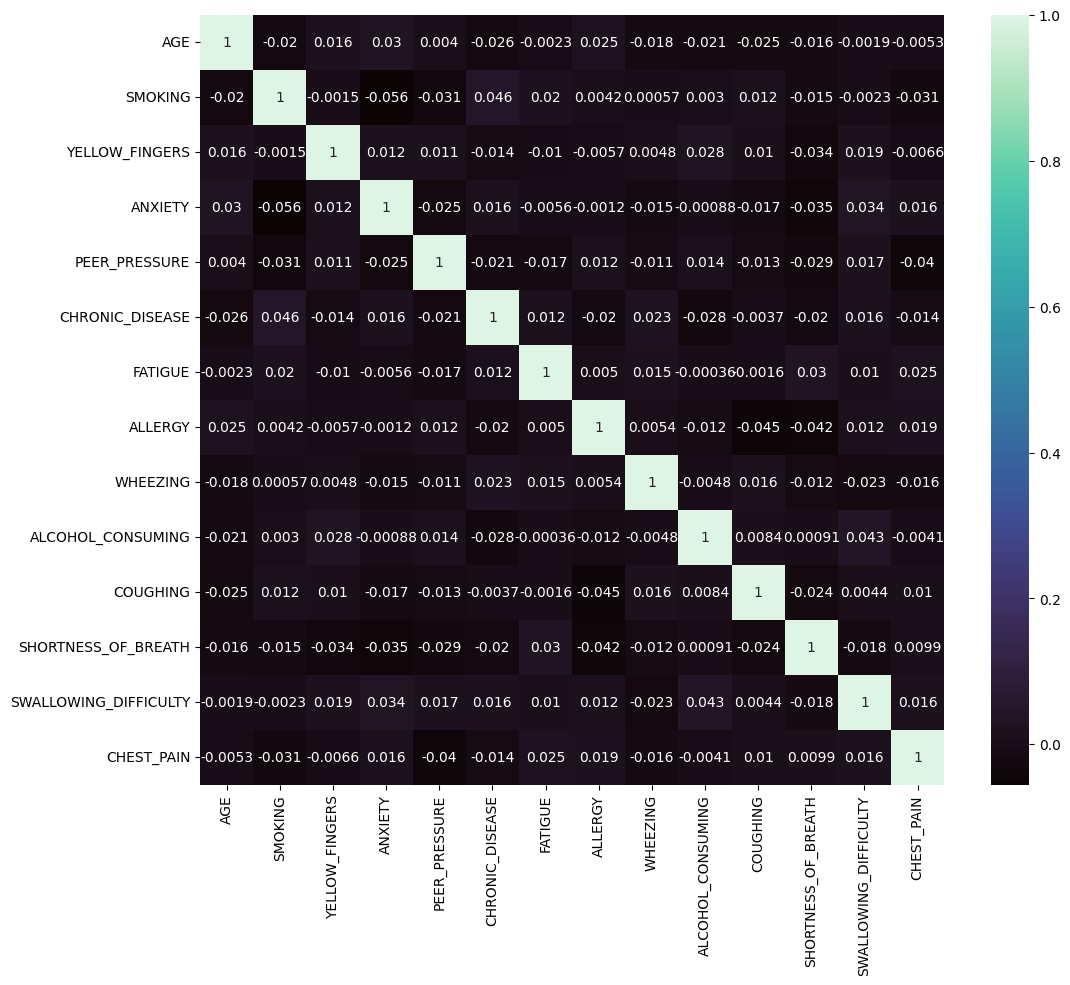

In [143]:
num_cols = df.select_dtypes(include='int64').columns.tolist()

plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='mako')

- There is no importat correlation between variables

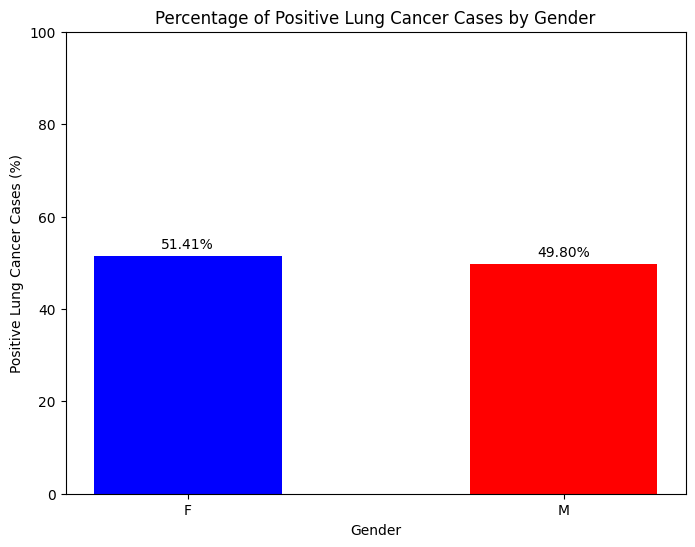

In [144]:
positive = df[df['LUNG_CANCER'] == 'YES']['GENDER'].value_counts()
total = df['GENDER'].value_counts()
positive_percent = (positive / total) * 100

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(positive_percent.index, positive_percent.values, color=['blue', 'r'], width=0.5)

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Percentage of Positive Lung Cancer Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Positive Lung Cancer Cases (%)')
plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.show()

In [145]:
# Encoding the data
df['GENDER'] = df['GENDER'].map({'M':0,'F':1})

In [146]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES':1,'NO':0})

In [147]:
# Dropping Age interval
df = df.drop('AGE_INTERVAL',axis=1)

In [148]:
# Scaling the Age data
sc = StandardScaler()
age = pd.DataFrame(df['AGE'])
age = sc.fit_transform(age)
df['AGE'] = age

In [149]:
Y = df.LUNG_CANCER
X = df.drop('LUNG_CANCER',axis=1)

In [150]:
# Splitting the data. 20% is for validation
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [151]:
x_size = (X_train.shape[0]) / X.shape[0]
print(x_size)
y_size = (y_train.shape[0]) / Y.shape[0]
print(y_size)

0.799866577718479
0.799866577718479


In [152]:
X_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
2352,1,0.599528,0,0,0,0,1,1,1,1,1,1,1,1,1
947,1,-0.215366,1,1,0,0,1,1,1,1,1,1,0,1,1
1263,0,1.210698,1,1,1,1,1,0,1,1,0,0,0,0,0
2376,1,-1.641430,0,1,1,1,0,1,0,1,0,0,1,1,1
484,0,1.006975,0,1,0,1,0,1,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,0,-1.573522,1,1,0,0,1,0,1,0,0,1,1,0,0
2552,0,-0.758629,1,0,0,1,1,0,1,0,0,0,1,1,0
537,1,0.803251,1,0,1,0,0,1,0,1,0,0,1,1,0
1220,0,1.482329,0,1,0,1,0,0,0,0,1,0,1,1,1


In [153]:
y_train

2352    0
947     0
1263    1
2376    0
484     0
       ..
1604    0
2552    0
537     1
1220    0
175     0
Name: LUNG_CANCER, Length: 2398, dtype: int64

In [158]:
# Function to calculate the Classification report and confusion Matrix
def conf_matrix(real, predicted):
    print(classification_report(real, predicted))

    cm = confusion_matrix(real, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],cmap='mako')
    plt.ylabel('Real')
    plt.xlabel('Predicted')
    plt.show()

## Decision Tree #1

In [159]:
dt = DecisionTreeClassifier()

In [160]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1194
           1       1.00      1.00      1.00      1204

    accuracy                           1.00      2398
   macro avg       1.00      1.00      1.00      2398
weighted avg       1.00      1.00      1.00      2398



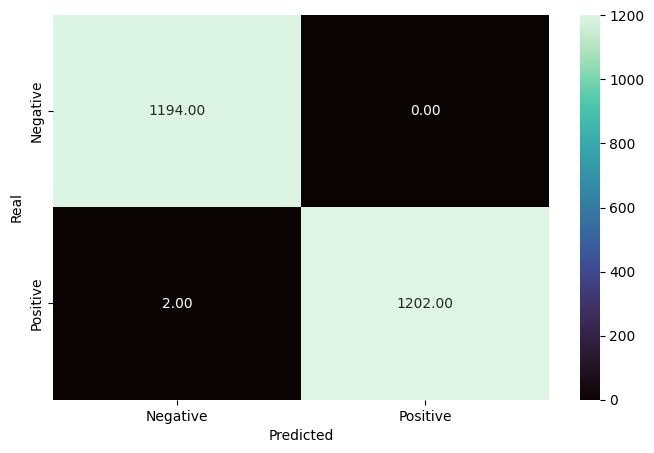

In [161]:
dt_pred1 = dt.predict(X_train)
conf_matrix(y_train, dt_pred1)

              precision    recall  f1-score   support

           0       0.47      0.47      0.47       287
           1       0.51      0.52      0.52       313

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.49      0.49      0.49       600



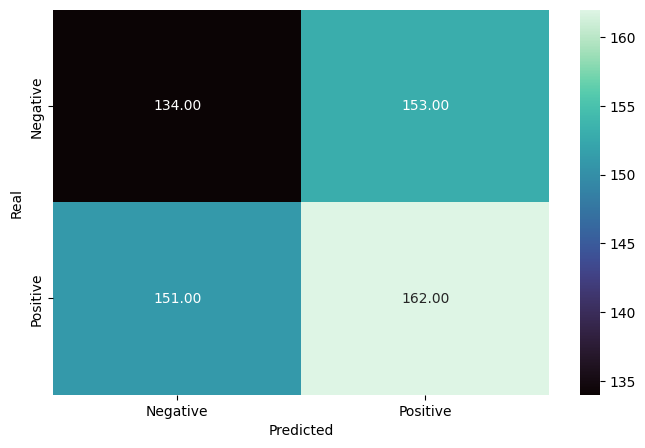

In [162]:
# Code to check the model efficiency on the test data
dt_evaluation_1 = dt.predict(X_test)
conf_matrix(y_test ,dt_evaluation_1)

### Decision Tree #2

In [163]:
estimator = DecisionTreeClassifier(random_state=7)

# Different parameters for the model
parameters = {
    "max_depth": [8,9,10,11],
    "max_leaf_nodes": np.arange(1,100,10),
    "min_samples_split": np.arange(1,20,1),
    'criterion': ['gini', 'entropy']
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the model to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=41, min_samples_split=14,
                       random_state=7)

              precision    recall  f1-score   support

           0       0.60      0.62      0.61      1194
           1       0.61      0.59      0.60      1204

    accuracy                           0.61      2398
   macro avg       0.61      0.61      0.61      2398
weighted avg       0.61      0.61      0.61      2398



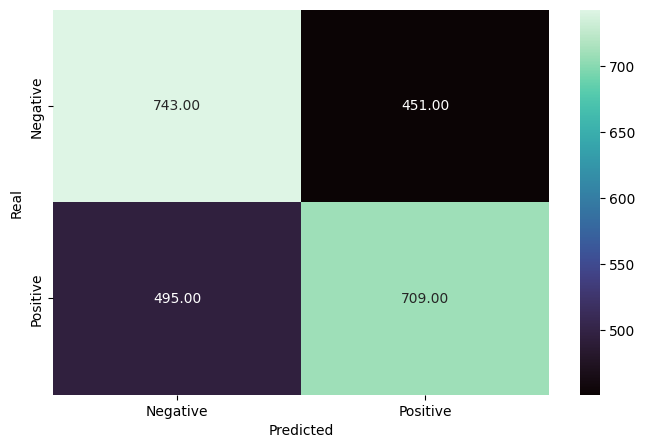

In [164]:
dt_predict_2 = estimator.predict(X_train)
conf_matrix(y_train,dt_predict_2)

              precision    recall  f1-score   support

           0       0.50      0.51      0.51       287
           1       0.54      0.53      0.54       313

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52       600



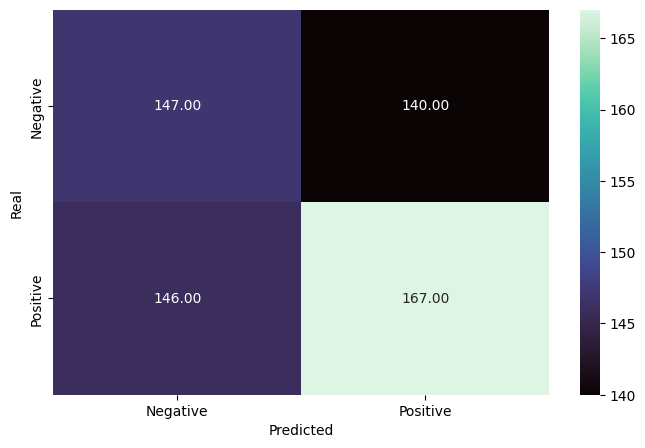

In [165]:
dt_evaluation_2 = estimator.predict(X_test)
conf_matrix(y_test,dt_evaluation_2)

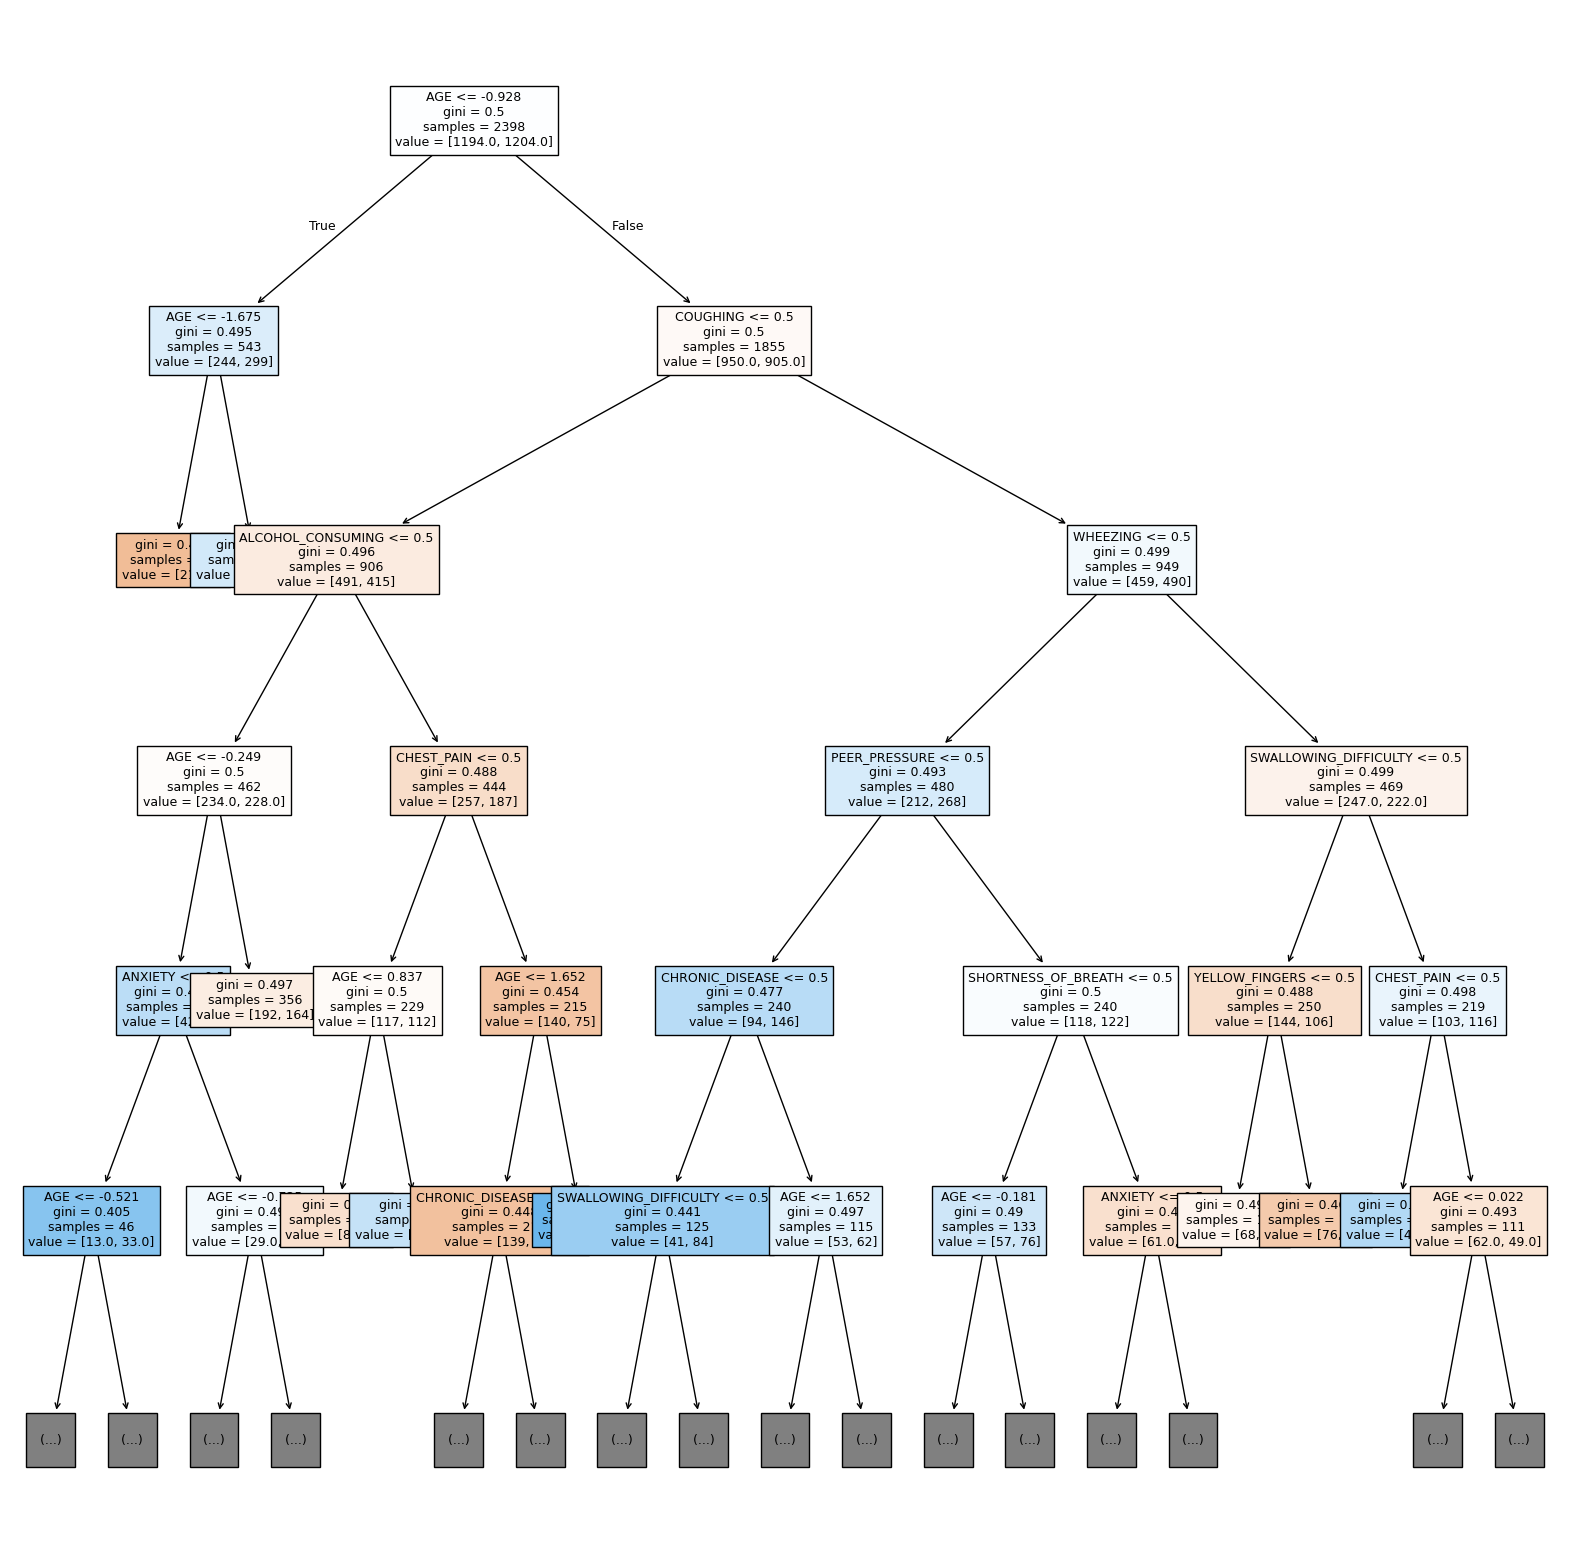

In [178]:
# Visualizing the decision tree
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 20))
out = tree.plot_tree(
    estimator,
    max_depth=5,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for i in out:
    arrow = i.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [177]:
z = -0.982

# Get the mean and standard deviation from the scaler
mu = sc.mean_[0]
sigma = np.sqrt(sc.var_[0])

# Calculate the original value
x = z * sigma + mu
x

40.71066735187726

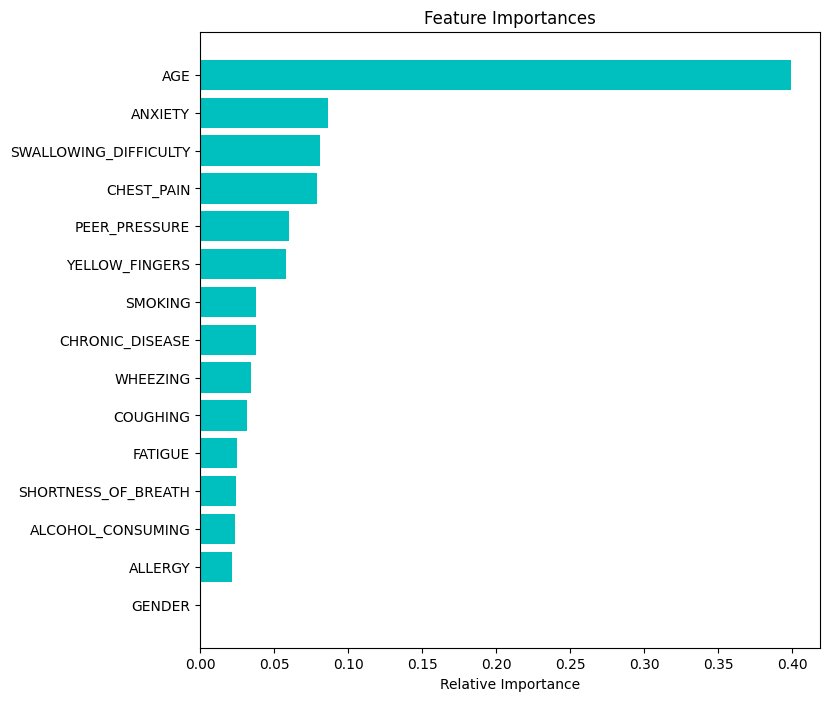

In [179]:
# Importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center",color='c')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Random Forest #1

In [180]:
rf = RandomForestClassifier(random_state=7)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1194
           1       1.00      1.00      1.00      1204

    accuracy                           1.00      2398
   macro avg       1.00      1.00      1.00      2398
weighted avg       1.00      1.00      1.00      2398



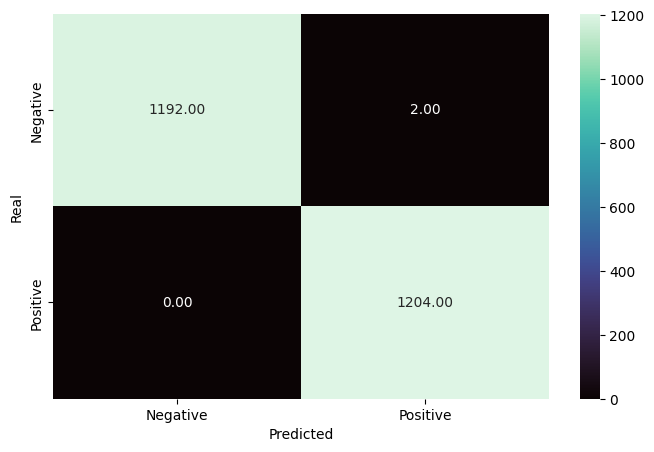

In [181]:
rf_pred1 = rf.predict(X_train)
conf_matrix(y_train, rf_pred1)

              precision    recall  f1-score   support

           0       0.50      0.54      0.52       287
           1       0.55      0.51      0.53       313

    accuracy                           0.53       600
   macro avg       0.53      0.53      0.52       600
weighted avg       0.53      0.53      0.53       600



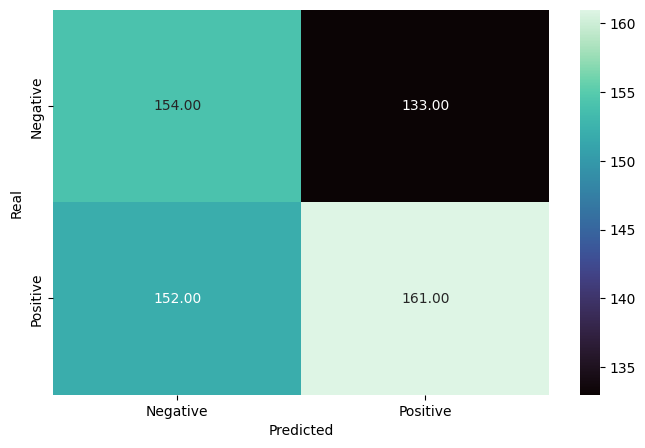

In [182]:
rf_evaluation_1 = rf.predict(X_test)
conf_matrix(y_test, rf_evaluation_1)

Random Forest #2

In [183]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 6],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "class_weight": ["balanced",{0: 0.5, 1: 0.5}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, cv=5,scoring='recall',n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
                       max_depth=6, max_features=0.8, min_samples_leaf=25,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.69      0.68      0.68      1194
           1       0.68      0.70      0.69      1204

    accuracy                           0.69      2398
   macro avg       0.69      0.69      0.69      2398
weighted avg       0.69      0.69      0.69      2398



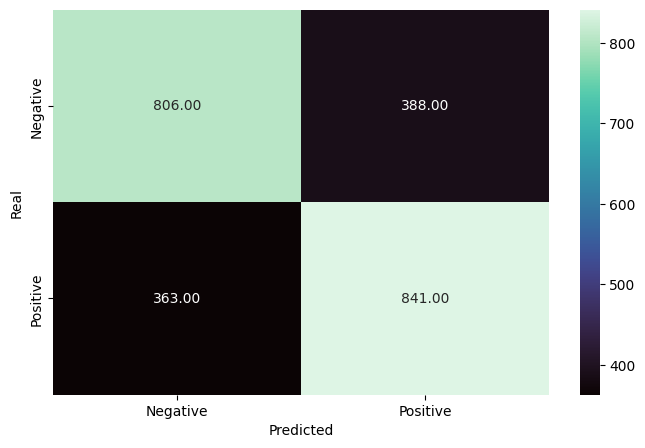

In [184]:
rf_predict_2 = rf_estimator_tuned.predict(X_train)
conf_matrix(y_train, rf_predict_2)

              precision    recall  f1-score   support

           0       0.52      0.52      0.52       287
           1       0.56      0.56      0.56       313

    accuracy                           0.54       600
   macro avg       0.54      0.54      0.54       600
weighted avg       0.54      0.54      0.54       600



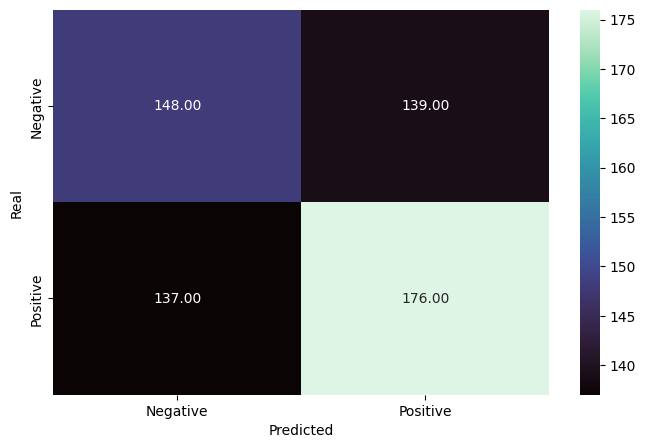

In [185]:
rf_evaluation_2 = rf_estimator_tuned.predict(X_test)
conf_matrix(y_test, rf_evaluation_2)

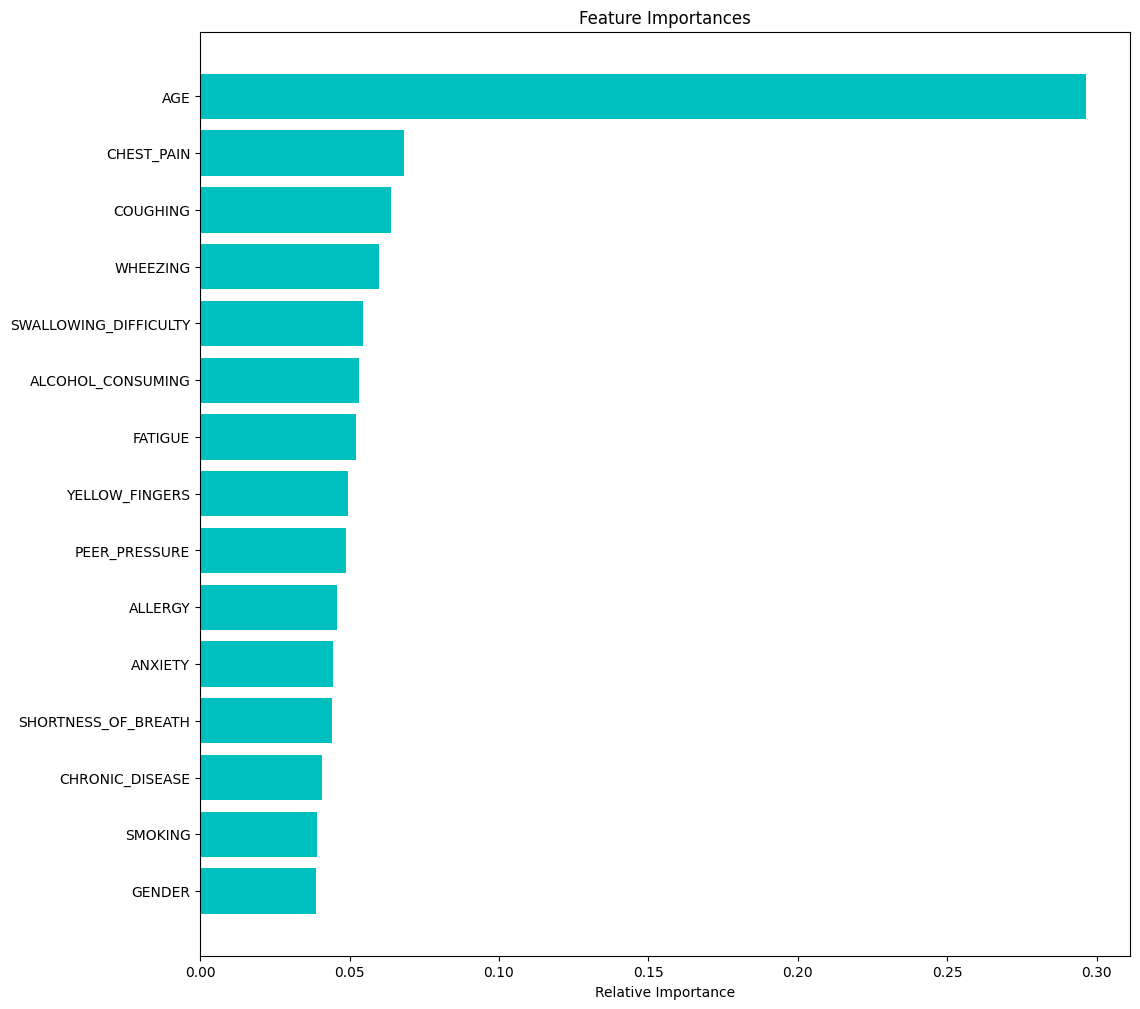

In [186]:
# Code to see the most important features for the Random Forest
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize = (12, 12))
plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], align = 'center',color = 'c')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

DeepLearning Model

In [187]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='mako',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

In [197]:
# Fixing the seed for random number generators
np.random.seed(7)

import random
random.seed(7)

tf.random.set_seed(7)

In [198]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [199]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Lungs')

In [200]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [201]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

Trial 5 Complete [00h 00m 16s]
val_accuracy: 0.5104166567325592

Best val_accuracy So Far: 0.5222222208976746
Total elapsed time: 00h 01m 37s


In [ ]:
## Printing the best models with their hyperparameters (The output is different from when I tried it on the testing branch. Nevertheless, this one wasn't any better.)
tuner.results_summary()

Testing

In [231]:
backend.clear_session()
np.random.seed(7)
import random
random.seed(7)
tf.random.set_seed(7)

In [235]:

def build_model(hp):
    model1 = Sequential()
    model1.add(Dense(192,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
    model1.add(Dropout(hp.Float('dropout_rate_1', min_value=0.0, max_value=0.5, step=0.05)))
    model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
    model1.add(Dropout(hp.Float('dropout_rate_2', min_value=0.0, max_value=0.5, step=0.05)))
    model1.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
    model1.add(Dropout(hp.Float('dropout_rate_3', min_value=0.0, max_value=0.5, step=0.05)))
    model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    model1.add(Dropout(hp.Float('dropout_rate_4', min_value=0.0, max_value=0.5, step=0.05)))
    model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    model1.add(Dropout(hp.Float('dropout_rate_5', min_value=0.0, max_value=0.5, step=0.05)))
    model1.add(Dense(1, activation = 'sigmoid'))

    model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model1

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,  # Number of hyperparameter configurations to try
    executions_per_trial=2,  # Number of models to train with each hyperparameter configuration
    directory='my_dir',
    project_name='intro_to_kt')

#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#tuner.search(X_train, y_train, epochs=50, validation_split=(0.2), callbacks=[early_stopping])

tuner.search(X_train, y_train, epochs=50, validation_split=(0.2))

Trial 20 Complete [00h 00m 48s]
val_loss: 0.6922701597213745

Best val_loss So Far: 0.6889829635620117
Total elapsed time: 00h 15m 41s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print(
    f"Best dropout rates: {best_hyperparameters.get('dropout_rate_1')}, {best_hyperparameters.get('dropout_rate_2'), {best_hyperparameters.get('dropout_rate_3')}, {best_hyperparameters.get('dropout_rate_4')}, {best_hyperparameters.get('dropout_rate_5')}}"
    )


Best dropout rates: 0.35000000000000003, (0.25, {0.35000000000000003}, {0.1}, {0.25})


Next model has the best paramters from Keras Tuner

In [280]:
backend.clear_session()
np.random.seed(7)
import random
random.seed(7)
tf.random.set_seed(7)

In [281]:
model = Sequential()
model.add(Dense(192,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model.add(Dropout(0.35))
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.25))
model.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.35))
model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
#model.add(Dropout(0.05))
model.add(Dense(1, activation = 'sigmoid'))

In [282]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 192)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 224)                 │          14,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 224)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           7,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,273 (149.50 KB)

 Trainable params: 38,273 (149.50 KB)

 Non-trainable params: 0 (0.00 B)

In [283]:
optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [284]:
history = model.fit(X_train,y_train,batch_size=64,epochs=50,verbose=0,validation_split = 0.2)

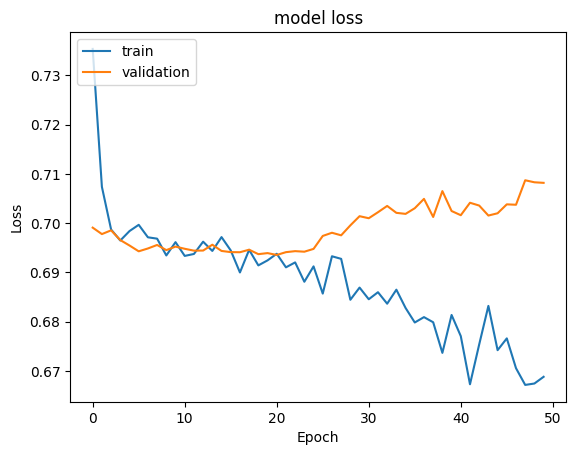

In [285]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Best Threshold=0.448396, G-Mean=0.556


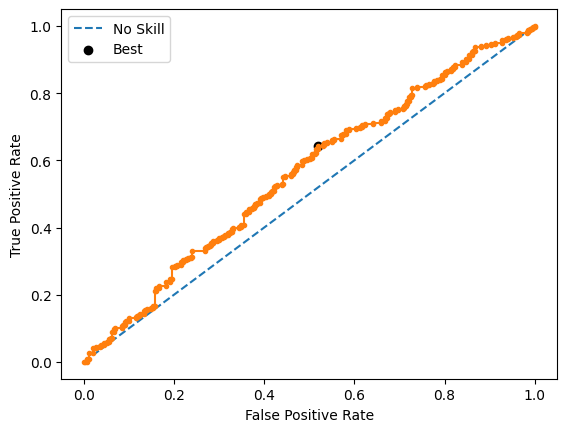

In [286]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = model.predict(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [287]:
y_pred_e=model.predict(X_test)
y_pred_e = (y_pred_e > thresholds[ix])
#y_pred_e7

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


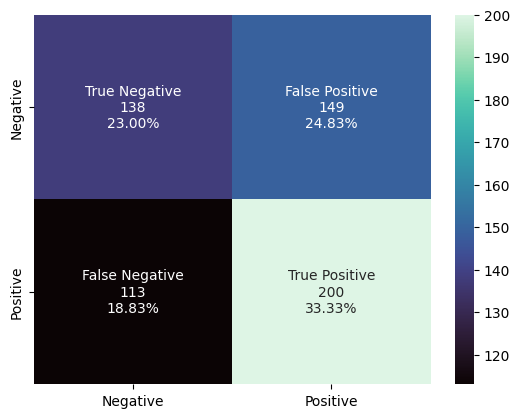

In [288]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm9=confusion_matrix(y_test, y_pred_e)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Negative','Positive']
make_confusion_matrix(cm9,
                      group_names=labels,
                      categories=categories,
                      cmap='mako')

In [289]:
#Accuracy as per the classification report
from sklearn import metrics
Confusion=metrics.classification_report(y_test,y_pred_e)
print(Confusion)

              precision    recall  f1-score   support

           0       0.55      0.48      0.51       287
           1       0.57      0.64      0.60       313

    accuracy                           0.56       600
   macro avg       0.56      0.56      0.56       600
weighted avg       0.56      0.56      0.56       600



Adding dropout